# Chapter 1 example p. 15

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
J = 10000 # number of policies
s = 1 # payoff

l0 = 30 # age limits
le = 60
l = np.arange(l0, le+1)

pl = np.exp(-0.0009-0.000044*np.exp(0.09076*l)) # model for survival probability
kpl = np.cumprod(pl[:le-l0])
kpl = np.insert(kpl,0, 1.0)
c = sum(kpl)
Nl = np.rint(J/c * kpl).astype(np.int64)
pj = np.repeat(pl, Nl) # probability of death


In [ ]:

m = 10000 # number of simulations
Y = np.zeros(m)
Ymat = np.zeros((J+1,100))

for j in range(J):
   u = np.random.random(size=m)
   X = np.zeros(m)
   X[u > pj[j]] = s # individual not die
   Y = Y+X
   Ymat[j+1,:] = Ymat[j,:]+X[:100]

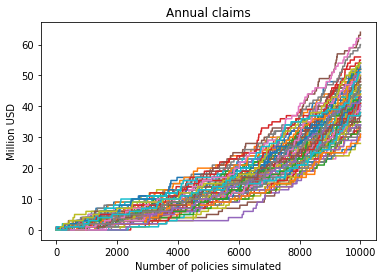

In [ ]:
plt.plot(np.arange(J+1),Ymat)
plt.xlabel("Number of policies simulated")
plt.ylabel("Million USD")
plt.title('Annual claims')
plt.show()

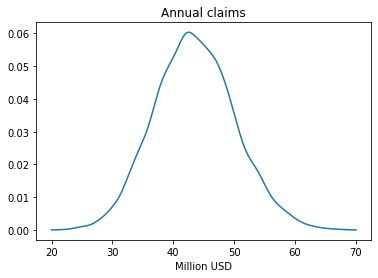

In [ ]:
from scipy.stats import kde

density = kde.gaussian_kde(Y)
x = np.linspace(20, 70, 200)
y = density(x)
plt.plot(x, y,)
plt.xlabel('Million USD')
plt.title('Annual claims')
plt.show()

# Example p. 16 Danish fire claims

In [ ]:
import pandas as pd

J1 = 1000 # small portfolio
J2 = 100000 # large portfolio
mu = 0.01 # annual claim frequency

url = '/studier/emner/matnat/math/STK3505/h20/danish_fire.csv'

fireData = pd.read_csv(url, sep=',')

In [ ]:
m = 10000
Xcal = np.zeros((2,m))
Ncal1 = np.random.poisson(mu*J1, size=m) # number of claims
Ncal2 = np.random.poisson(mu*J2, size=m)
for i in range(m):
    Z1 = np.random.choice(fireData['x'],size=Ncal1[i]) # draw from the data
    Z2 = np.random.choice(fireData['x'],size=Ncal2[i])
    Xcal[0][i] = sum(Z1)
    Xcal[1][i] = sum(Z2)

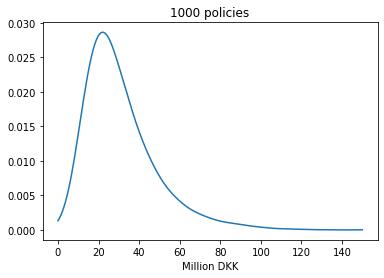

In [ ]:
density = kde.gaussian_kde(Xcal[0])
x = np.linspace(0, 150, 200)
y = density(x)
plt.plot(x, y,)
plt.xlabel('Million DKK')
plt.title('1000 policies')
plt.show()

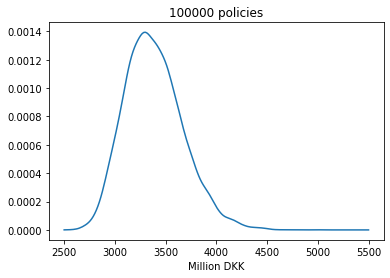

In [ ]:
density = kde.gaussian_kde(Xcal[1])
x = np.linspace(2500, 5500, 200)
y = density(x)
plt.plot(x, y,)
plt.xlabel('Million DKK')
plt.title('100000 policies')
plt.show()

#Example p. 17: Vasicek model

In [2]:
r0 = 0.03
xi = 0.07
a1 = 0.7
a2 = 0.95
sigma1 = 0.016
sigma2 = 0.007

m = 100
K = 30

In [3]:
Yk1 = np.ones((K+1,m))*(r0-xi)
Yk2 = np.ones((K+1,m))*(r0-xi)
for k in range(K):
    eps = np.random.normal(size=m)
    Yk1[k+1,:] = a1*Yk1[k,:]+sigma1*eps
    Yk2[k+1,:] = a2*Yk2[k,:]+sigma2*eps
r0k1 = Yk1+xi
r0k2 = Yk2+xi

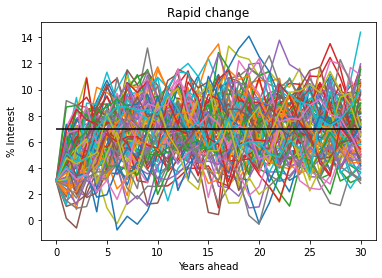

In [4]:
plt.plot(np.arange(K+1), r0k1*100, zorder=1)
plt.xlabel('Years ahead')
plt.ylabel('% Interest')
plt.title('Rapid change')
plt.hlines(100 * xi, xmin=0, xmax=K, zorder=2)
plt.show()

<function matplotlib.pyplot.show>

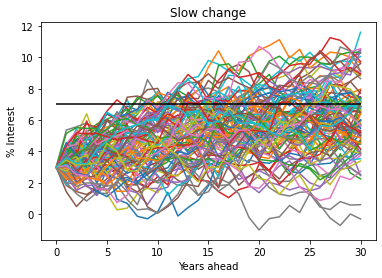

In [5]:
plt.plot(np.arange(K+1), r0k2*100, zorder=1)
plt.xlabel('Years ahead')
plt.ylabel('% Interest')
plt.title('Slow change')
plt.hlines(100 * xi, xmin=0, xmax=K, zorder=2)
plt.show

# Example p. 18: Stock prices

In [6]:
xi1 = 0.004
xi2 = 0.008
sigma1 = 0.04
sigma2 = 0.08
y = 5
K = y*12
m = 100
Yk1 = np.zeros((K+1,m))
Yk2 = np.zeros((K+1,m))

In [7]:
for k in range(K):
   eps = np.random.normal(size=m)
   Yk1[k+1,:] = Yk1[k,:]+xi1+sigma1*eps # simulation on log-scale
   Yk2[k+1,:] = Yk2[k,:]+xi2+sigma2*eps
R0k1 = np.exp(Yk1)-1
R0k2 = np.exp(Yk2)-1

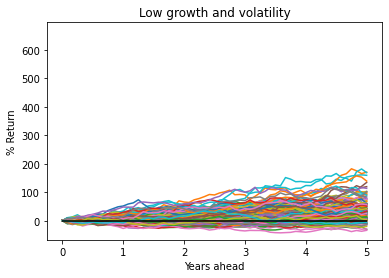

In [8]:
max1, max2 = np.max(R0k1*100), np.max(R0k2*100)
min1, min2 = np.min(R0k1*100), np.min(R0k2*100)
plt.plot(np.arange(K+1)/12.0, R0k1*100, zorder=1)
plt.ylim([min(min1, min2), max(max1,max2)])
plt.xlabel('Years ahead')
plt.ylabel('% Return')
plt.title('Low growth and volatility')
plt.hlines(0,xmin=0, xmax=y, zorder=2)
plt.show()

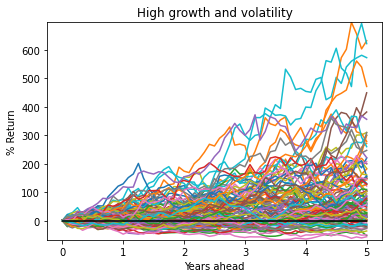

In [9]:
plt.plot(np.arange(K+1)/12.0,R0k2*100, zorder=1)
plt.ylim([min(min1, min2), max(max1,max2)])
plt.xlabel('Years ahead')
plt.ylabel('% Return')
plt.title('High growth and volatility')
plt.hlines(0,xmin=0, xmax=y, zorder=2)
plt.show()